In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Ładowanie zmiennych środowiskowych
load_dotenv()

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_database = os.getenv("DB_DATABASE")

conn = (
    f"mssql+pyodbc://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)
engine = create_engine(conn)
print("Connection successful!")

'''Depesze, Depesze_PogodaBiezaca, DaneModelTMP
'''


Connection successful!


'Depesze, Depesze_PogodaBiezaca, DaneModelTMP\n'

# 📊 Queries

In [6]:
# Mean temperature between 2000 and 2018
meantemp_to_2018 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [SredMies2000to2018] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature for 2019
meantemp_2019 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [srednie19] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature for 2022
meantemp_2022 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [srednie22] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature rom new period?
meantemp_new = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [SredMiesNew] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

KeyboardInterrupt: 

In [ ]:
# 2000 - 2018 - data preparation
chosen_columns = ['IDStacji', 'Miesiac', 'SredTemp']
df = pd.read_sql_query(meantemp_to_2018, engine)
print(df.duplicated().sum())
print(df.isna().sum())
print(df.isnull().sum())
filtered_df = df[chosen_columns]
print(filtered_data.shape)
filtered_data.drop_duplicates(subset=chosen_columns, inplace=True)
print(filtered_data.shape)

NameError: name 'meantemp_to_2018' is not defined

In [ ]:
'''df["Miesiac"]
miasto = pd.Series(['Warszawa'], name="Nazwa")
max_temp = df["SredTemp"].max()
miasto
max_temp
df.describe()
df
df.info()
df[df["SredTemp"] > 10]
dane_wawy = df[(df["Nazwa"].eq("Warszawa"))] | (df["Nazwa"].eq("Zakopane"))]
df.loc[df["SredTemp"] > 10, "Nazwa"].shape
df_max10 = df.sort_values(by="SredTemp", ascending=False).head(10)
df_max10
dane_wawy["SredTemp"].plot()
plt.show()'''

'df["Miesiac"]\nmiasto = pd.Series([\'Warszawa\'], name="Nazwa")\nmax_temp = df["SredTemp"].max()\nmiasto\nmax_temp\ndf.describe()\ndf\ndf.info()\ndf[df["SredTemp"] > 10]\ndane_wawy = df[(df["Nazwa"].eq("Warszawa"))] | (df["Nazwa"].eq("Zakopane"))]\ndf.loc[df["SredTemp"] > 10, "Nazwa"].shape\ndf_max10 = df.sort_values(by="SredTemp", ascending=False).head(10)\ndf_max10\ndane_wawy["SredTemp"].plot()\nplt.show()'

In [ ]:


dane_wawy_sorted

NameError: name 'dane_wawy_sorted' is not defined

In [ ]:
df_sorted = df.sort_values(by="Miesiac",ascending=True)
df_sorted.plot.scatter(x="NazwaM", y="SredTemp", alpha=0.5)


NameError: name 'df' is not defined

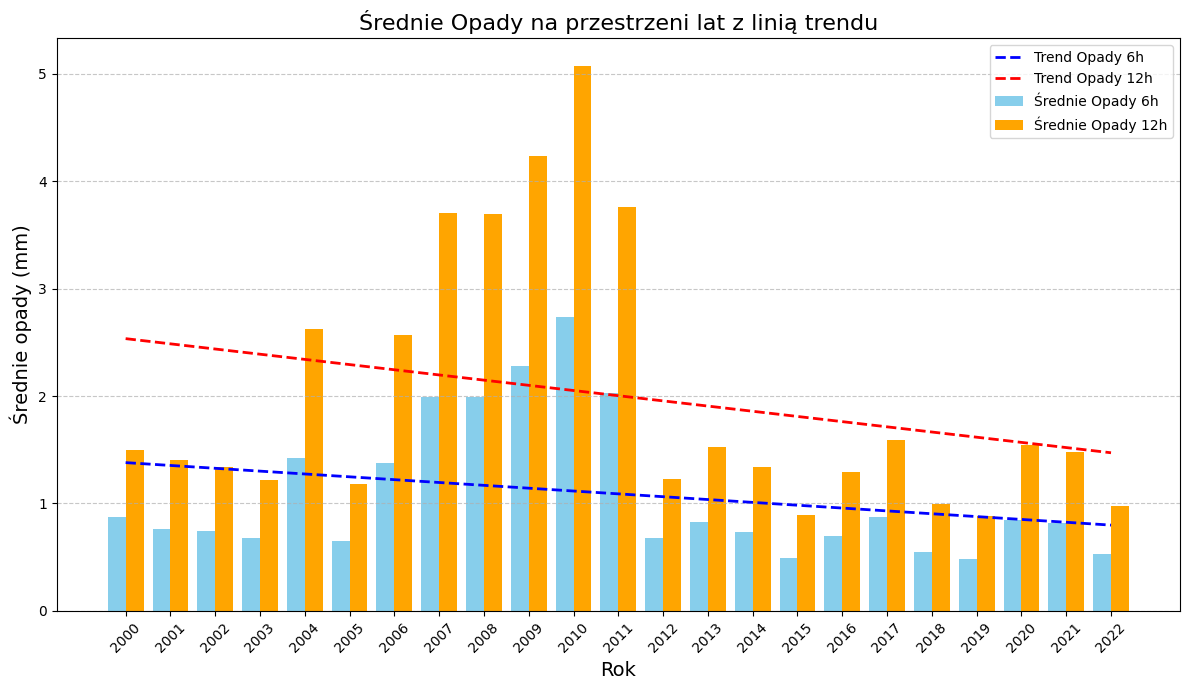

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Pobranie danych z bazy (zapytanie SQL do analizy opadów)
query = """
SELECT 
    YEAR(data) AS Rok,
    AVG(Opady6) AS SrednieOpady6h,
    AVG(Opady12) AS SrednieOpady12h
FROM 
    Synop.dbo.DaneModelTMP
WHERE 
    Opady6 IS NOT NULL AND Opady12 IS NOT NULL
GROUP BY 
    YEAR(data)
ORDER BY 
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y6 = df['SrednieOpady6h']
y12 = df['SrednieOpady12h']

# Obliczanie współczynników regresji dla opadów 6-godzinnych
coeff6 = np.polyfit(x, y6, 1)  # Dopasowanie liniowe
trend6 = np.polyval(coeff6, x)  # Wyliczenie wartości linii trendu

# Obliczanie współczynników regresji dla opadów 12-godzinnych
coeff12 = np.polyfit(x, y12, 1)  # Dopasowanie liniowe
trend12 = np.polyval(coeff12, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 7))
bar_width = 0.4
plt.bar(x - bar_width / 2, y6, width=bar_width, label='Średnie Opady 6h', color='skyblue')
plt.bar(x + bar_width / 2, y12, width=bar_width, label='Średnie Opady 12h', color='orange')

# Dodanie linii trendu
plt.plot(x, trend6, color='blue', linestyle='--', linewidth=2, label='Trend Opady 6h')
plt.plot(x, trend12, color='red', linestyle='--', linewidth=2, label='Trend Opady 12h')

# Dodanie etykiet i tytułu
plt.title('Średnie Opady na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnie opady (mm)', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()


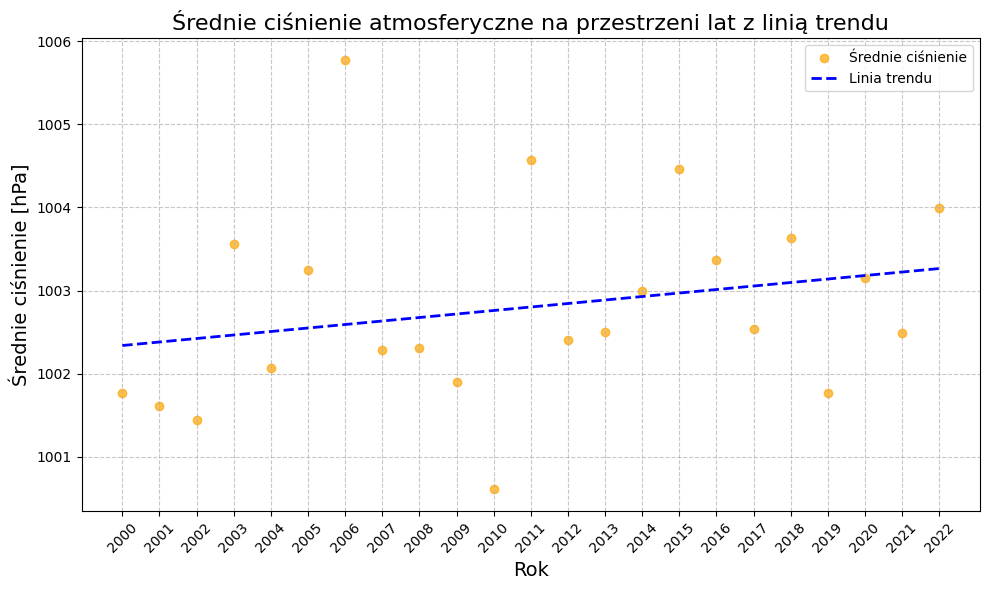

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# Pobranie danych z bazy (zapytanie SQL do analizy ciśnienia)
query = """
SELECT 
    YEAR(data) AS Rok,
    AVG(CisnienieNaPoziomieStacji) AS SrednieCisnienie
FROM 
    Synop.dbo.DaneModelTMP
WHERE 
    CisnienieNaPoziomieStacji IS NOT NULL
GROUP BY 
    YEAR(data)
ORDER BY 
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y = df['SrednieCisnienie']

# Obliczanie współczynników regresji (linia trendu)
coeff = np.polyfit(x, y, 1)  # Dopasowanie liniowe
trend = np.polyval(coeff, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='orange', label='Średnie ciśnienie', alpha=0.7)

# Dodanie linii trendu
plt.plot(x, trend, color='blue', linestyle='--', linewidth=2, label='Linia trendu')

# Dodanie etykiet i tytułu
plt.title('Średnie ciśnienie atmosferyczne na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnie ciśnienie [hPa]', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


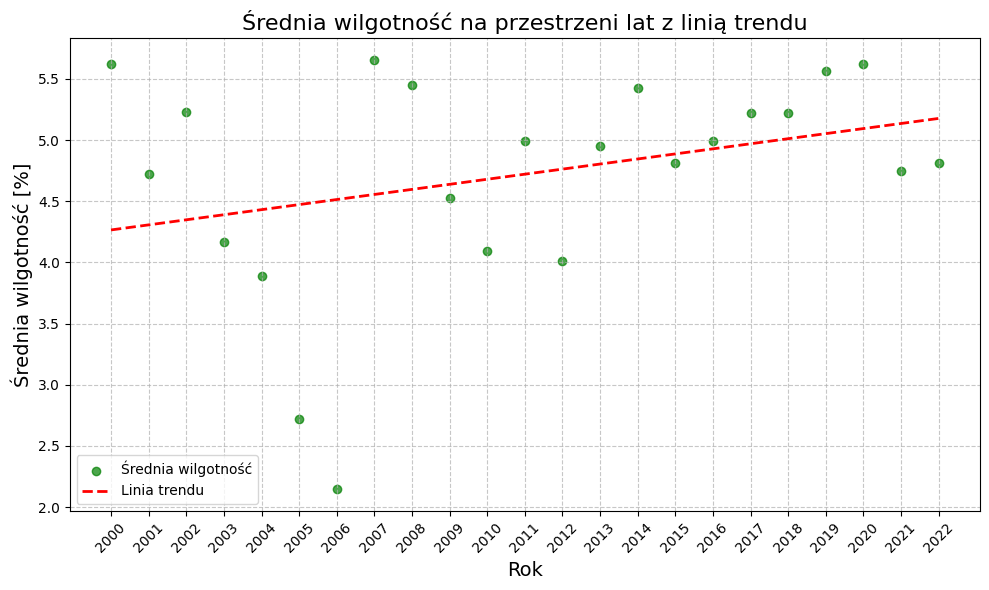

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


# Pobranie danych z bazy (zapytanie SQL do analizy wilgotności)
query = """
SELECT 
    YEAR(data) AS Rok,
    AVG(TemperaturaPunktuRosy) AS SredniaWilgotnosc
FROM 
    Synop.dbo.DaneModelTMP
WHERE 
    TemperaturaPunktuRosy IS NOT NULL
GROUP BY 
    YEAR(data)
ORDER BY 
    Rok
"""
df = pd.read_sql(query, engine)

# Wyciągnięcie danych do regresji
x = df['Rok']
y = df['SredniaWilgotnosc']

# Obliczanie współczynników regresji (linia trendu)
coeff = np.polyfit(x, y, 1)  # Dopasowanie liniowe
trend = np.polyval(coeff, x)  # Wyliczenie wartości linii trendu

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Średnia wilgotność', alpha=0.7)

# Dodanie linii trendu
plt.plot(x, trend, color='red', linestyle='--', linewidth=2, label='Linia trendu')

# Dodanie etykiet i tytułu
plt.title('Średnia wilgotność na przestrzeni lat z linią trendu', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Średnia wilgotność [%]', fontsize=14)
plt.xticks(x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


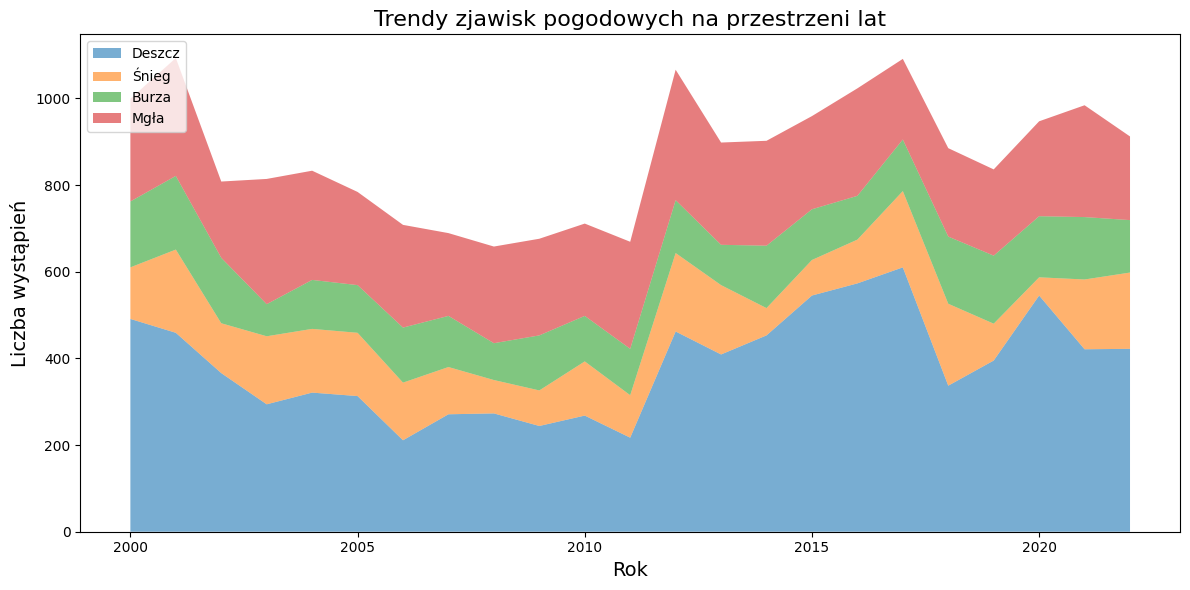

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Zapytanie SQL do analizy częstotliwości występowania zjawisk pogodowych
query = """
SELECT 
    YEAR(data) AS Rok,
    SUM(CASE WHEN Deszcz6 = 1 THEN 1 ELSE 0 END) AS LiczbaDeszczy,
    SUM(CASE WHEN Snieg6 = 1 THEN 1 ELSE 0 END) AS LiczbaSniegów,
    SUM(CASE WHEN Burza6 = 1 THEN 1 ELSE 0 END) AS LiczbaBurz,
    SUM(CASE WHEN Mgla6 = 1 THEN 1 ELSE 0 END) AS LiczbaMgli
FROM 
    Synop.dbo.DaneModelTMP
WHERE 
    Deszcz6 IS NOT NULL OR Snieg6 IS NOT NULL OR Burza6 IS NOT NULL OR Mgla6 IS NOT NULL
GROUP BY 
    YEAR(data)
ORDER BY 
    Rok
"""
df = pd.read_sql(query, engine)

# Wykres powierzchniowy dla zjawisk pogodowych
plt.figure(figsize=(12, 6))

plt.stackplot(df['Rok'], df['LiczbaDeszczy'], df['LiczbaSniegów'], df['LiczbaBurz'], df['LiczbaMgli'],
              labels=['Deszcz', 'Śnieg', 'Burza', 'Mgła'], alpha=0.6)
plt.title('Trendy zjawisk pogodowych na przestrzeni lat', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
